# start2impact University | Progetto Advanced Analytics

Ti diamo il benvenuto nel notebook del progetto del Corso Advanced Analytics!

Prima di tutto bisogna importare una serie di librerie core, che saranno quelle principali per rispondere alle domande del progetto:

In [20]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

Per usare il tuo Google Drive con Colab, bisogna montarlo tramite il seguente comando. Dovrebbe chiederti l'accesso tramite il tuo account Google, concediglielo e seleziona tutte le spunte disponibili.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dopodiché puoi partire con l'importazione del dataset **supermarket sales**, il primo che ti servirà: dovresti averlo già uploadato nel tuo Drive, inserisci la location dove lo hai salvato andando a sostituire il placeholder *{PATH_AL_FILE_SUL_TUO_DRIVE}*, così da importarlo nell'ambiente di lavoro:

In [22]:
regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/supermarket_sales.csv', encoding='windows-1254')

# Esplorazione del dataset

**In questa breve sezione andrai a visualizzare il dataset in forma tabellare**, così da averne una rappresentazione più intuitiva e comprendere meglio con che tipologia di dato hai a che fare. Per semplicità si mostrano solo le prime 100 occorrenze.

In [23]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Vai quindi a vedere più nel dettaglio quali sono i metadati principali delle colonne del dataset:

In [24]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Da questo puoi già vedere che non ci sono valori nulli, per cui non dovrai usare nessuna strategia per fillarli, altri valori invece sono categorici e quindi bisognerà usare una strategia per codificarli; insomma hai già un po' di informazioni di massima sul dato!
Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno semplicemente eliminate, come per esempio l'ID della fattura, la data della vendita, l'orario e un altro paio:

In [25]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

Puoi quindi vedere che alcune colonne sono state rimosse e adesso hai solo quelle che effettivamente sono utili ai fini dello sviluppo del modello:

In [26]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


# Media, mediana, moda e deviazione standard

Si parte con un esercizio molto semplice, in cui ti chiedo di **calcolare usando numpy la media, la mediana e la moda della colonna su cui andrai a fare predizioni (la label), ovvero Rating**. Ai fini del progetto la colonna Rating acquisisce un significato differente rispetto a quello originale del dataset: essa dà una valutazione alla transazione in base alla redditività della stessa e quindi ti dice quanto è stata proficua la stessa per la catena di supermercati.
Questo ti darà una prima idea di sintesi sui rating assegnati ai vari ordini:

In [27]:
from scipy import stats
mean = np.mean(regression_dataset['Rating'])
median = np.median(regression_dataset['Rating'])
mode_result = stats.mode(regression_dataset['Rating'])
mode = mode_result.mode.item()
print(f"media di Rating :{mean:.2f}")
print(f"mediana di Rating :{median}")
print(f"moda di Rating :{mode}")

media di Rating :6.97
mediana di Rating :7.0
moda di Rating :6.0


Come hai visto durante il Corso, la **deviazione** è una importantissima misura di "sparsità" dei dati, ed è una informazione che è molto utile da ottenere sulla label. Ti chiedo quindi di calcolarla, sempre usando Numpy:

In [28]:
standard_deviation = np.std(regression_dataset['Rating'])
print(f"Deviazione standard di Rating :{standard_deviation:.2f}")

Deviazione standard di Rating :1.72


# Come sono distribuiti i valori della label

A questo punto andiamo a vedere come sono graficamente distribuiti i dati:

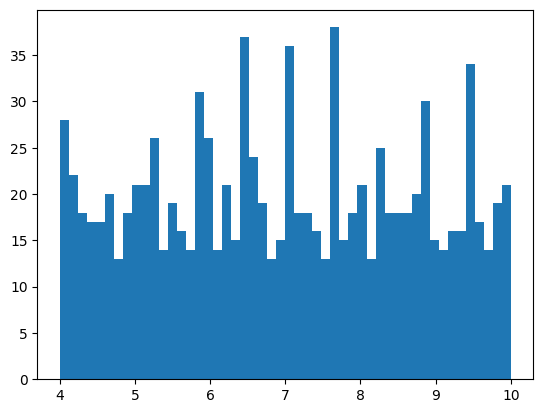

In [29]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

Come puoi vedere, la distribuzione dei rating è più o meno uniforme e non c'è skewness.

Il discorso è invece diverso per l'utile lordo:

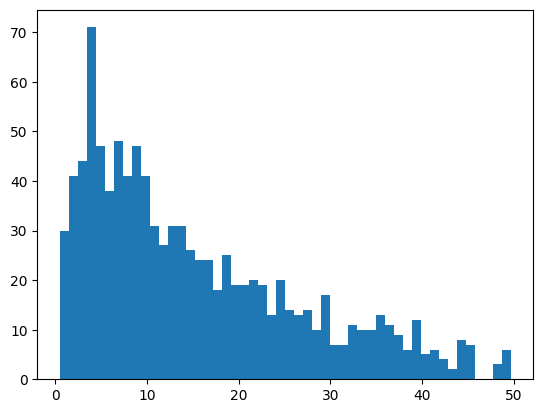

In [30]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

Come puoi vedere, qui la skewness c'è eccome e la maggioranza degli ordini sembra avere un income lordo basso.
Qual è, quindi, il valore di questa skewness esattamente? Tocca a te scoprirlo nella prossima cella!

Un piccolo consiglio: farlo con Numpy non è il modo più semplice!

In [31]:
from scipy.stats import skew
skewness_value = skew(regression_dataset['gross income'])
print(f"Skewness del gross income: {skewness_value:.2f}")

Skewness del gross income: 0.89


# Encoding delle variabili categoriche

Come avrai sicuramente notato, ci sono delle variabili (come "Branch", "City", "Customer type", "Gender", "Product line" e "Payment") che non sono numeriche e che quindi non possono essere direttamente masticate dagli algoritmi che andrai a utilizzare più tardi.
Ricordi le **tecniche per effettuarne l'enconding**? Questo è il momento di usarle per trasformarle in vettori!

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_col = ['Branch','City','Customer type','Gender','Product line','Payment']
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = onehot_encoder.fit_transform(regression_dataset[cat_col])
encoded_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names_out(cat_col))
encoded_dataset = pd.concat([regression_dataset.drop(columns=cat_col), encoded_df], axis=1)
print(encoded_dataset.head())

   Unit price  Quantity  gross income  Rating  Branch_A  Branch_B  Branch_C  \
0       74.69         7       26.1415     9.1       1.0       0.0       0.0   
1       15.28         5        3.8200     9.6       0.0       0.0       1.0   
2       46.33         7       16.2155     7.4       1.0       0.0       0.0   
3       58.22         8       23.2880     8.4       1.0       0.0       0.0   
4       86.31         7       30.2085     5.3       1.0       0.0       0.0   

   City_Mandalay  City_Naypyitaw  City_Yangon  ...  Gender_Male  \
0            0.0             0.0          1.0  ...          0.0   
1            0.0             1.0          0.0  ...          0.0   
2            0.0             0.0          1.0  ...          1.0   
3            0.0             0.0          1.0  ...          1.0   
4            0.0             0.0          1.0  ...          1.0   

   Product line_Electronic accessories  Product line_Fashion accessories  \
0                                  0.0        

# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono sicuramente il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che come hai visto ha una grossa skewness. Questo dovrebbe migliorare la performance dei modelli che andrai a costruire a brevissimo, per cui ti chiedo di procedere in tal senso con la **standardizzazione**:

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_to_standardize = ['Unit price', 'gross income']
encoded_dataset[col_to_standardize] = scaler.fit_transform(encoded_dataset[col_to_standardize])
print(encoded_dataset.head())

   Unit price  Quantity  gross income  Rating  Branch_A  Branch_B  Branch_C  \
0    0.718160         7      0.919607     9.1       1.0       0.0       0.0   
1   -1.525303         5     -0.987730     9.6       0.0       0.0       1.0   
2   -0.352781         7      0.071446     7.4       1.0       0.0       0.0   
3    0.096214         8      0.675780     8.4       1.0       0.0       0.0   
4    1.156959         7      1.267125     5.3       1.0       0.0       0.0   

   City_Mandalay  City_Naypyitaw  City_Yangon  ...  Gender_Male  \
0            0.0             0.0          1.0  ...          0.0   
1            0.0             1.0          0.0  ...          0.0   
2            0.0             0.0          1.0  ...          1.0   
3            0.0             0.0          1.0  ...          1.0   
4            0.0             0.0          1.0  ...          1.0   

   Product line_Electronic accessories  Product line_Fashion accessories  \
0                                  0.0        

# Train e Test Split

Bene, è quindi giunta l'ora di affrontare l'ultima fase prima di allenare un modello di machine learning: l**o split fra training e test set**!
Per un primo approccio ti suggeriamo di usare una ratio 80:20 o 70:30, che il più delle volte funzionano bene.

Ti chiediamo di chiamare le feature di train, le feature di test, la label di train e le label di test rispettivamente con i nomi *X_train*, *X_test*, *y_train* e *y_test*:

In [34]:
from sklearn.model_selection import train_test_split

X = encoded_dataset.drop('Rating', axis = 1)
y = encoded_dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(f"Dimensioni di :{X_train.shape}")
print(f"Dimensioni di :{X_test.shape}")
print(f"Dimensioni di :{y_train.shape}")
print(f"Dimensioni di :{y_test.shape}")

Dimensioni di :(700, 22)
Dimensioni di :(300, 22)
Dimensioni di :(700,)
Dimensioni di :(300,)


# Linear Regression

Ora è giunto il momento di predire i **Rating** usando il modello più semplice che hai visto, ovvero la linear regression!
Ti chiediamo di chiamare il modello *regressor*.

Procedi pure nella cella che segue:

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Adesso che il training è avvenuto è il momento di valutare come questo performa. Le metriche che prendiamo in considerazione, che sono le principali per la regressione lineare, sono **il mean squadred error e il mean absolute error**. Ti chiediamo di calcolarle (sempre usando sklearn), avendo cura di chiamarle rispettivamente *MSE* e *MAE*. Punta a renderle il più vicine allo zero possibile, perché il modello è più di qualità quanto più queste sono zero:

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = lin_reg.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.0712101231284974 
MAE = 1.5001522112180907


Linear Regression: MSE = 2.9279355571031083, MAE = 1.4631871769222726 quando usiamo 20%, e MSE = 3.0712101231284974, MAE = 1.5001522112180907 con il 30%, quindi possiamo notare un declino in performance

# Polynomial Regression

Prova in questa sezione a lavorare in modo simile a quanto fatto per la linear regression, ma usando la polynomial regression, che è sicuramente più potente della prima.

Come prima, ti chiediamo di chiamare *regressor* il modello e *poly_regressor* l'oggetto relativo alle feature polinomiali:

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.transform(X_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = poly_regressor.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print('Polynomial MSE =', MSE, '\nPolynomial MAE =', MAE)

Polynomial MSE = 3.0712101231284974 
Polynomial MAE = 1.5001522112180907


Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

Probabilmente il problema che abbiamo riscontrato è quello di over fitting, abbassando il degree possiamo notare un leggero miglioramento dal precedente MSE=3.48 MAE=1.58, alzandolo a 3 la situazione va a peggiorarsi di molto facendo salire i valori fino a 6 e piu. Come altre opzione esistono anche la Cross-Validation, o una regolazione "ridge" e "lasso" che però ho visto far parte della lezione successiva.

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Miglior grado (degree):", grid_search.best_params_['poly__degree'])
print("Miglior punteggio (MSE):", -grid_search.best_score_)
best_poly_regressor = grid_search.best_estimator_
y_pred = best_poly_regressor.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print(f'\nValutazione sul set di test con il miglior modello:')
print(f'Polynomial MSE = {MSE}')
print(f'Polynomial MAE = {MAE}')

Miglior grado (degree): 1
Miglior punteggio (MSE): 3.01850082487147

Valutazione sul set di test con il miglior modello:
Polynomial MSE = 3.0712101231284974
Polynomial MAE = 1.5001522112180907


# Logistic Regression

In questa sezione si cambia dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui andrai a valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

La prima cosa è da fare è** importare il nuovo dataset**, ovvero apple_quality, che questa volta ti chiediamo di fare in autonomia, chiamando il dataset *classification_dataset*:

In [40]:
column_types = {
    'A_id': float,
    'Size': float,
    'Weight': float,
    'Sweetness': float,
    'Crunchiness': float,
    'Juiciness': float,
    'Ripeness': float,
    'Acidity': float
}
classification_dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/apple_quality.csv', dtype = column_types, encoding='windows-1254')

Ti suggeriamo quindi  di printare le prime 50 righe...

In [41]:
classification_dataset.head(50)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


... e dei metadati delle colonne:

In [42]:
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


Come puoi vedere, il dataset è già pulito e quasi tutte le colonne sono numeriche. L'unica a non esserlo è proprio la label, che va encodata:

In [43]:
cat_col = ['Quality']
encoded_class_dataset = pd.get_dummies(classification_dataset, columns = cat_col, dtype = float)
print(encoded_class_dataset.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity  Quality_bad  Quality_good  
0 -0.491590          0.0           1.0  
1 -0.722809          0.0           1.0  
2  2.621636          1.0           0.0  
3  0.790723          0.0           1.0  
4  0.501984          0.0           1.0  


Bisogna poi ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [44]:
from sklearn.model_selection import train_test_split

X = encoded_class_dataset.drop(['Quality_good', 'Quality_bad'], axis = 1)
y = encoded_class_dataset['Quality_good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(f"Dimensioni di X_train:{X_train.shape}")
print(f"Dimensioni di X_test:{X_test.shape}")
print(f"Dimensioni di y_train:{y_train.shape}")
print(f"Dimensioni di y_test:{y_test.shape}")

Dimensioni di X_train:(3200, 8)
Dimensioni di X_test:(800, 8)
Dimensioni di y_train:(3200,)
Dimensioni di y_test:(800,)


Puoi finalmente usare la logistic regression per allenare il modello vero e proprio, che ti chiedo di chiamare *logistic_regressor*:

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Una metrica che ti permette subito di valutare la bontà del modello, come saprai, è l'***F1 score***, che dovrebbe essere idealmente superiore a 0.80. Cerca anche di massimizzare la media della precision e del recall, che idealmente dovrebbero anch'essi essere superiori a 0.80:

In [46]:
from sklearn.metrics import classification_report

y_predict_test = log_reg.predict(X_test)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       409
         1.0       0.73      0.81      0.77       391

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.77      0.76      0.76       800



Ora è intessante andare a "disegnare" la **confusion matrix**, che ti mostra quali sono le categorie su cui il modello che hai costruito è "bravo" e su quali no, così da eventualmente avere delle informazioni in più per migliorarlo. Prova a farlo in autonomia usando scikit-learn:

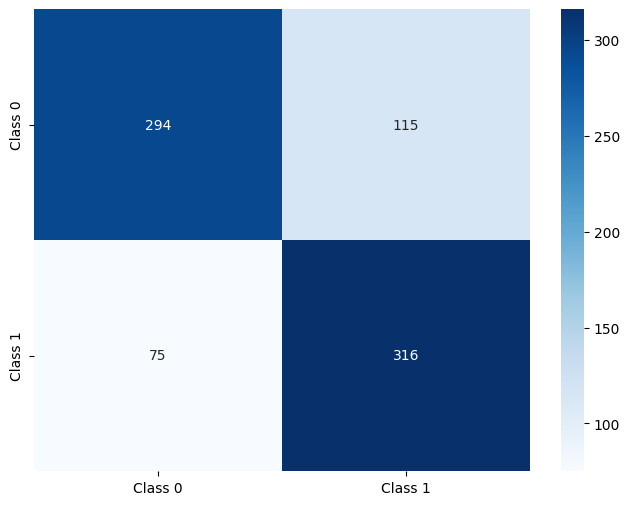

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.show()

Ora proviamo a migliorare il valore di f1 diminuendo i falsi positivi

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')

print("=== FEATURE ENGINEERING ===")
print(f"Dimensioni originali: X_train {X_train.shape}, X_test {X_test.shape}")
# 1. STANDARDIZZAZIONE/NORMALIZZAZIONE
print("\n1. Applicazione scaling...")
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

best_scaler = None
best_f1_scaling = 0
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Test rapido con modello base
    model_test = LogisticRegression(max_iter=1000, random_state=1)
    model_test.fit(X_train_scaled, y_train)
    y_pred_test = model_test.predict(X_test_scaled)
    f1_test = f1_score(y_test, y_pred_test)
    print(f"   {scaler_name}: F1 = {f1_test:.4f}")
    if f1_test > best_f1_scaling:
        best_f1_scaling = f1_test
        best_scaler = scaler

print(f"Miglior scaler: {type(best_scaler).__name__}")
X_train_processed = best_scaler.fit_transform(X_train)
X_test_processed = best_scaler.transform(X_test)
# 2. CREAZIONE FEATURE POLINOMIALI
print("\n2. Creazione feature polinomiali...")
degrees = [2]
best_poly_f1 = best_f1_scaling
best_poly_degree = 1
for degree in degrees:
    print(f"   Testando degree={degree}...")
    poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_processed)
    X_test_poly = poly.transform(X_test_processed)
    print(f"   Nuove dimensioni: {X_train_poly.shape}")
    # Se troppi feature, usa feature selection
    if X_train_poly.shape[1] > 50:
        print("   Troppe feature, applicando selezione...")
        selector = SelectKBest(f_classif, k=50)
        X_train_poly = selector.fit_transform(X_train_poly, y_train)
        X_test_poly = selector.transform(X_test_poly)
        print(f"   Dimensioni ridotte: {X_train_poly.shape}")

    # Test performance
    model_test = LogisticRegression(max_iter=1000, random_state=1)
    model_test.fit(X_train_poly, y_train)
    y_pred_test = model_test.predict(X_test_poly)
    f1_test = f1_score(y_test, y_pred_test)
    print(f"   F1-score con degree={degree}: {f1_test:.4f}")
    if f1_test > best_poly_f1:
        best_poly_f1 = f1_test
        best_poly_degree = degree
        X_train_best = X_train_poly.copy()
        X_test_best = X_test_poly.copy()

if best_poly_degree == 1:
    X_train_best = X_train_processed
    X_test_best = X_test_processed
    print("   Meglio senza feature polinomiali")
else:
    print(f"   Miglior degree: {best_poly_degree}")

# 3. FEATURE SELECTION AVANZATA
print("\n3. Feature selection avanzata...")
# Metodo 1: SelectKBest con diversi score functions
selection_methods = {
    'f_classif': f_classif,
    'chi2': chi2 if np.all(X_train_best >= 0) else None
}

best_selection_f1 = best_poly_f1
best_k = X_train_best.shape[1]
k_values = [10, 15, 20, min(30, X_train_best.shape[1]), X_train_best.shape[1]]
for method_name, score_func in selection_methods.items():
    if score_func is None:
        continue

    print(f"\n   Testando {method_name}:")
    for k in k_values:
        if k >= X_train_best.shape[1]:
            continue

        selector = SelectKBest(score_func, k=k)
        X_train_selected = selector.fit_transform(X_train_best, y_train)
        X_test_selected = selector.transform(X_test_best)
        model_test = LogisticRegression(max_iter=1000, random_state=1)
        model_test.fit(X_train_selected, y_train)
        y_pred_test = model_test.predict(X_test_selected)
        f1_test = f1_score(y_test, y_pred_test)
        print(f"     k={k}: F1 = {f1_test:.4f}")
        if f1_test > best_selection_f1:
            best_selection_f1 = f1_test
            best_k = k
            X_train_final = X_train_selected
            X_test_final = X_test_selected
            best_selector = selector

if best_k == X_train_best.shape[1]:
    X_train_final = X_train_best
    X_test_final = X_test_best
    print("   Meglio senza feature selection")
else:
    print(f"   Miglior k: {best_k}")

# 4. MODELLO FINALE CON FEATURE OTTIMIZZATE
print("\n4. Allenamento modello finale...")
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=1),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_final, y_train)
final_model = grid_search.best_estimator_
# 5. RISULTATI FINALI
print("\n=== RISULTATI FINALI ===")
# Modello originale
original_model = LogisticRegression(max_iter=1000, random_state=1)
original_model.fit(X_train, y_train)
y_pred_original = original_model.predict(X_test)
f1_original = f1_score(y_test, y_pred_original)

# Modello con feature engineering
y_pred_final = final_model.predict(X_test_final)
f1_final = f1_score(y_test, y_pred_final)

print(f"F1-score ORIGINALE: {f1_original:.4f}")
print(f"F1-score con FEATURE ENGINEERING: {f1_final:.4f}")
print(f"MIGLIORAMENTO: {f1_final - f1_original:.4f}")

print(f"\nDimensioni finali: {X_train_final.shape}")
print(f"Migliori parametri: {grid_search.best_params_}")

print("\nClassification Report finale:")
print(classification_report(y_test, y_pred_final))

# 6. SALVATAGGIO PIPELINE COMPLETA
import joblib

preprocessing_pipeline = {
    'scaler': best_scaler,
    'poly_degree': best_poly_degree,
    'selector': best_selector if best_k < X_train_best.shape[1] else None,
    'final_model': final_model
}

joblib.dump(preprocessing_pipeline, 'complete_pipeline.pkl')
print("\nPipeline completa salvata come 'complete_pipeline.pkl'")

# Funzione per applicare la pipeline a nuovi dati
def predict_new_data(X_new):
    """Applica l'intera pipeline a nuovi dati"""
    # 1. Scaling
    X_scaled = preprocessing_pipeline['scaler'].transform(X_new)

    # 2. Polynomial features (se applicabile)
    if preprocessing_pipeline['poly_degree'] > 1:
        poly = PolynomialFeatures(degree=preprocessing_pipeline['poly_degree'],
                                interaction_only=True, include_bias=False)
        X_poly = poly.fit_transform(X_scaled)
    else:
        X_poly = X_scaled

    # 3. Feature selection (se applicabile)
    if preprocessing_pipeline['selector'] is not None:
        X_selected = preprocessing_pipeline['selector'].transform(X_poly)
    else:
        X_selected = X_poly

    # 4. Predizione
    return preprocessing_pipeline['final_model'].predict(X_selected)

print("\nUsa predict_new_data(X_new) per nuove predizioni!")

=== FEATURE ENGINEERING ===
Dimensioni originali: X_train (3200, 8), X_test (800, 8)

1. Applicazione scaling...
   StandardScaler: F1 = 0.7679
   MinMaxScaler: F1 = 0.7600
Miglior scaler: StandardScaler

2. Creazione feature polinomiali...
   Testando degree=2...
   Nuove dimensioni: (3200, 36)
   F1-score con degree=2: 0.8636
   Miglior degree: 2

3. Feature selection avanzata...

   Testando f_classif:
     k=10: F1 = 0.8212
     k=15: F1 = 0.8438
     k=20: F1 = 0.8500
     k=30: F1 = 0.8622
   Meglio senza feature selection

4. Allenamento modello finale...

=== RISULTATI FINALI ===
F1-score ORIGINALE: 0.7689
F1-score con FEATURE ENGINEERING: 0.8596
MIGLIORAMENTO: 0.0908

Dimensioni finali: (3200, 36)
Migliori parametri: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report finale:
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86       409
         1.0       0.84    

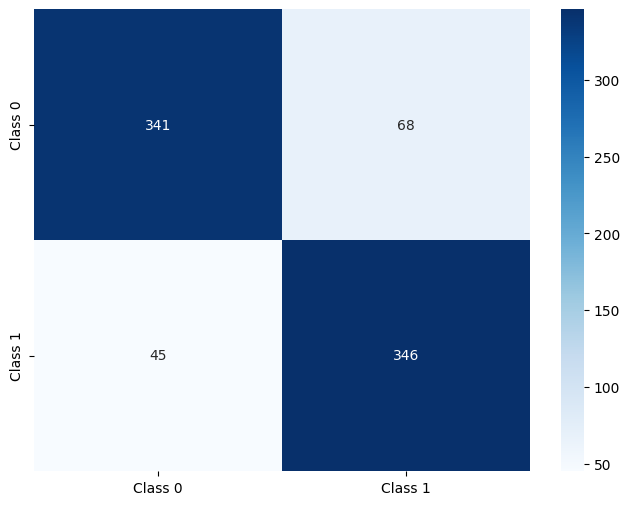

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_optimal = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.show()

Testando svariate volte con metodi diversi e perdendoci la testa, ho optato di applicare molteplici trasformazioni e questo è stato l'unico che ha fornito sostanziali miglioramenti poiché se presi uno ad uno purtroppo non riuscivano a portare miglioramenti apprezzabili che perche peggiorava o migliorava di poco, o perche saliva vicino allo 0.8 ma non riusciva a raggiungere la soglia e a quel punto ormai era una sfida personale.
Ovviamente, si ho usato l'ia per il codice ma è stato complesso trovare i giusto input e soprattutto trovare il bot giusto perche molti consigliavano solamente "quello che dovrebbe essere giusto" ma non quello che era utile a me e il mio dataset, sicuramente ho usato processi non adatti a questo progetto perche piu avanzati o non studiati come "    'chi2': chi2 if np.all(X_train_best >= 0) else None" questo chi2 mai sentito in vita mia però è stata un modo per esplorare nuove conoscenze e soprattutto metodi di lavorare sul codice.
Spero sia abbastanza il risultato e sia accettabile per il progetto però sinceramente proprio non sono riuscito a trovare metodi che risolvessero il problema.

# Decision Tree

**Puoi provare a usare un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.** Generalmente, come visto durante la parte teorica del Corso, i decision tree sono più potenti, ma scoprilo costruendone uno!

Il procedimento non è dissimile da quelli usati in precedenza, quindi procedi pure al training:

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
y_predict_test = tree_model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

y_pred_proba = tree_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Area Under the Curve (AUC): {roc_auc:.2f}")
print(classification_report(y_test, y_predict_test))

Area Under the Curve (AUC): 0.84
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       409
         1.0       0.82      0.85      0.83       391

    accuracy                           0.83       800
   macro avg       0.84      0.84      0.83       800
weighted avg       0.84      0.83      0.84       800



Non so quale altra metrica possa servire, quindi ho aggiungo un calcolo del AUC.

E poi alla costruzione della confusion matrix:

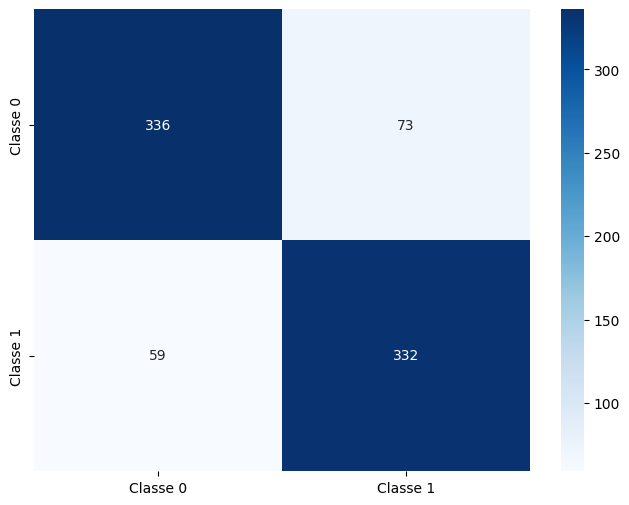

In [52]:
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.show()

Quanti sono gli errori? Di più o di meno di quelli commessi dal modello con la logistic regression?

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

# --- Esecuzione del Modello Base (Default) ---
print("=====================================================")
print("             SCENARIO 1: MODELLO BASE (DEFAULT)             ")
print("=====================================================")

# Crea e addestra il modello base (senza specificare max_depth o criterion)
base_model = DecisionTreeClassifier(random_state=1)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

# Calcola e salva i risultati del modello base
base_f1 = f1_score(y_test, y_pred_base, average='weighted')
base_report = classification_report(y_test, y_pred_base)

print(base_report)
print(f"--> F1-Score del Modello Base: {base_f1:.4f}")
print("\n" + "="*50 + "\n")

# --- Inizializzazione per la Ricerca del Modello Ottimale ---
# Variabili per tracciare il miglior modello, partendo dal Modello Base.
best_f1_score = base_f1
best_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0}
best_report = base_report

# Griglie di valori per iperparametri da testare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],  # Valori di esempio
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5],
    'min_impurity_decrease': [0.0, 0.01]
}

# --- Loop per la Ricerca a Griglia (Grid Search) ---
print("=====================================================")
print("             RICERCA IPERPARAMETRI (GRID SEARCH)             ")
print("=====================================================")

for criterion in param_grid['criterion']:
    for depth in param_grid['max_depth']:
        for split in param_grid['min_samples_split']:
            for leaf in param_grid['min_samples_leaf']:
                for impurity in param_grid['min_impurity_decrease']:

                    # Salta la configurazione di default per non ripeterla
                    if criterion == 'gini' and depth is None and split == 2 and leaf == 1 and impurity == 0.0:
                        continue


                    # Crea il modello con la combinazione corrente
                    tree_model = DecisionTreeClassifier(
                        criterion=criterion,
                        max_depth=depth,
                        min_samples_split=split,
                        min_samples_leaf=leaf,
                        min_impurity_decrease=impurity,
                        random_state=1
                    )

                    # Addestra il modello
                    tree_model.fit(X_train, y_train)
                    y_pred = tree_model.predict(X_test)
                    current_f1 = f1_score(y_test, y_pred, average='weighted')

                    # Aggiorna il miglior modello se l'f1-score è superiore
                    if current_f1 > best_f1_score:
                        best_f1_score = current_f1
                        best_params = {
                            'criterion': criterion,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'min_impurity_decrease': impurity
                        }
                        best_report = classification_report(y_test, y_pred)
                        y_pred_best = y_pred
                        print(f"Testing combination: criterion='{criterion}', max_depth={depth}, min_samples_split={split}, min_samples_leaf={leaf}, min_impurity_decrease={impurity}")
                        print(f"--> NUOVO MIGLIORE TROVATO! F1-Score: {best_f1_score:.4f}")

# --- Riepilogo Finale e Confronto ---
print("\n" + "#"*70)
print("              RIEPILOGO E CONFRONTO FINALE                ")
print("#"*70)

print("\n--- Risultati del Modello Base ---")
print("Parametri: criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.0")
print(f"F1-Score del Modello Base (Default): {base_f1:.4f}")

print("\n--- Risultati del Modello Migliore Trovato ---")
print(f"Parametri Ottimali: {best_params}")
print(f"F1-Score del Modello Migliore: {best_f1_score:.4f}")

print("\n--- Miglior Classification Report ---")
print(best_report)

print("\n" + "-"*50)
if best_f1_score > base_f1:
    f1_improvement = (best_f1_score - base_f1) / base_f1 * 100
    print(f"✅ Miglioramento significativo! L'F1-Score è migliorato del {f1_improvement:.2f}%")
else:
    print("❌ L'ottimizzazione degli iperparametri non ha superato il modello base.")
print("-" * 50)

             SCENARIO 1: MODELLO BASE (DEFAULT)             
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       409
         1.0       0.82      0.85      0.83       391

    accuracy                           0.83       800
   macro avg       0.84      0.84      0.83       800
weighted avg       0.84      0.83      0.84       800

--> F1-Score del Modello Base: 0.8350


             RICERCA IPERPARAMETRI (GRID SEARCH)             
Testing combination: criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.0
--> NUOVO MIGLIORE TROVATO! F1-Score: 0.8363
Testing combination: criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=5, min_impurity_decrease=0.0
--> NUOVO MIGLIORE TROVATO! F1-Score: 0.8375
Testing combination: criterion='gini', max_depth=None, min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.0
--> NUOVO MIGLIORE TROVATO! F1-Score: 0.8450

##########

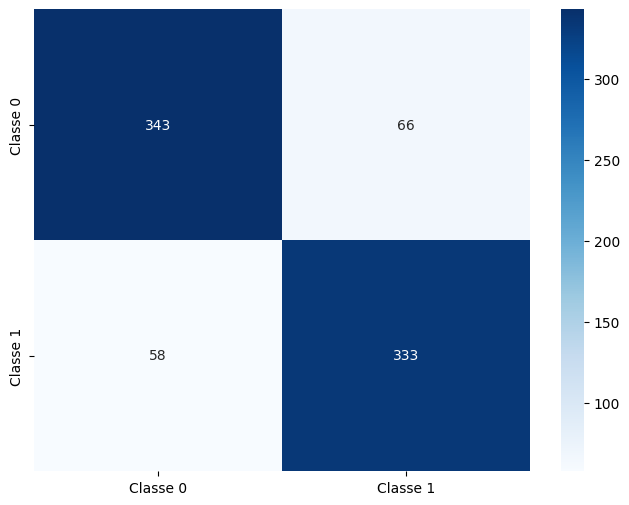

In [74]:
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.show()

Quali sono le feature che sono state più importanti per il decision tree che hai costruito? Scoprilo con la feature importance, che ti invitiamo a calcolare e poi a printare nella cella che segue:

In [54]:
importances = tree_model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
print(sorted_importances)

Size           0.244944
Sweetness      0.229125
Juiciness      0.146866
Acidity        0.135498
Ripeness       0.134683
Weight         0.108884
A_id           0.000000
Crunchiness    0.000000
dtype: float64


# K-Means Clustering

Eccoci al K-Means Clustering, il più utilizzato algoritimo tra quelli non supervisionati.

Per prima cosa bisogna eliminare la label perché, come sai, il K-Means Clustering è un algoritmo non supervisionato e non deve quindi averla:

In [55]:
clustering_dataset = classification_dataset.drop(columns=['Quality'])

Prova a trainare il modello usando l'algoritmo in oggetto, il procedimento è sempre simile a quanto visto in precedenza. Prova a settare dapprima il numero dei cluster a due (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [56]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1, n_init=10)
kmeans_model.fit(X_train)

KMeans(n_clusters=3, n_init=10, random_state=1)

Effettua quindi una predizione e vedi a che qualità corrisponde la mela che hai dato in input al modello:

In [57]:
random_index = np.random.randint(0, len(X_test))
random_apple_features = X_test[random_index:random_index+1]
predicted_cluster = kmeans_model.predict(random_apple_features)
print(f"Caratteristiche della mela casuale (riga {random_index}):\n{random_apple_features}")
print(f"\nLa mela è stata assegnata al cluster: {predicted_cluster[0]}")

Caratteristiche della mela casuale (riga 376):
        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
2657  2657.0 -0.495101 -0.421046    0.26411     0.295675   2.022736  1.070498   

       Acidity  
2657 -0.040585  

La mela è stata assegnata al cluster: 2


A che cluster è stata assegnata la mela, è buona o cattiva?
Che succede se invece provi a settare il numero di cluster a tre? Testa questo scenario e rifai la predizione, magari potresti scoprire che in realtà ci sono anche delle mele di qualità intermedia!

# Time Series

L'ultimo tema del progetto è quello delle time series: se ci hai fatto caso, il dataset che hai utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case. Adesso è tempo di riprenderla!
In questo scenario vogliamo provare a **capire come i gross income evolvono nel tempo**, quindi prendi il dataset originale, ovvero *regression_raw_dataset* ed elimina tutte le colonne, tenendo solo "Date" e "gross income" e avendo cura di chiamare *timeseries_dataset* il nuovo dataset:

In [58]:
timeseries_dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/supermarket_sales.csv', encoding='windows-1254')[['Date', 'gross income']]

Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

In [59]:
timeseries_dataset.head(100)

,Date,gross income
0,1/5/2019,26.1415
1,3/8/2019,3.8200
2,3/3/2019,16.2155
3,1/27/2019,23.2880
4,2/8/2019,30.2085
...,...,...
95,3/8/2019,4.8580
96,3/29/2019,43.9350
97,2/9/2019,3.7350
98,3/23/2019,7.9125


A questo punto prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

In [60]:
from sklearn.linear_model import LinearRegression
timeseries_dataset['Date'] = pd.to_datetime(timeseries_dataset['Date'])
timeseries_dataset['Days_Since_Start'] = (timeseries_dataset['Date'] - timeseries_dataset['Date'].min()).dt.days

In [61]:
X = timeseries_dataset[['Days_Since_Start']]
y = timeseries_dataset['gross income']
linear_time_model = LinearRegression()
linear_time_model.fit(X, y)

LinearRegression()

E vai a controllare le solite metriche, cioè MSE ed MAE:

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_predict = linear_time_model.predict(X)
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 136.88768067988764 
MAE = 9.61585545546774


Ti renderai conto che probabilmente non sono così elevati come in precedenza, questo perché la regressione lineare sulle time series spesso fallisce e, come già visto nella teoria, c'è bisogno di altri modelli più perfomanti.

# Time Series con XGBoost (opzionale)

A proposito di modelli più performanti per le time series, ricordi XGBoost? Se ti va, puoi provare a impiegare quest'ultimo per costruire il modello. **Questa sezione è opzionale e non necessaria per superare il progetto.**

In [63]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)
xgb_model.fit(X, y)
y_predict_xgb = xgb_model.predict(X)
MSE = mean_squared_error(y, y_predict_xgb)
MAE = mean_absolute_error(y, y_predict_xgb)
print('MSE =', MSE, '\nMAE =', MAE)



MSE = 123.69851570243199 
MAE = 9.020477831413269


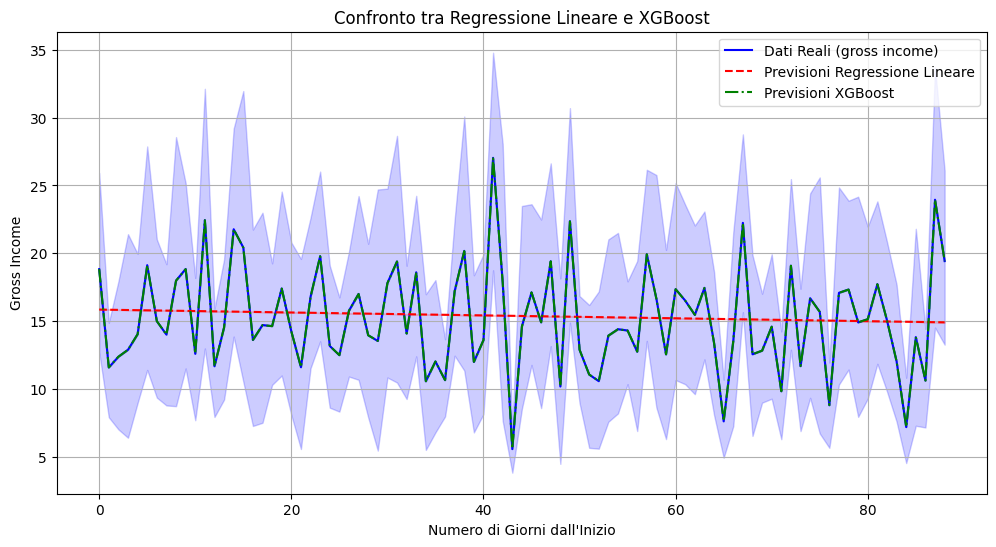

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una figura e un asse per il grafico
plt.figure(figsize=(12, 6))

# Grafico dei dati reali ("gross income" nel tempo)
sns.lineplot(x=X['Days_Since_Start'], y=y, label='Dati Reali (gross income)', color='blue')

# Grafico delle previsioni del modello di Regressione Lineare
sns.lineplot(x=X['Days_Since_Start'], y=y_predict, label='Previsioni Regressione Lineare', color='red', linestyle='--')

# Grafico delle previsioni del modello XGBoost
sns.lineplot(x=X['Days_Since_Start'], y=y_predict_xgb, label='Previsioni XGBoost', color='green', linestyle='-.')

# Aggiungi titolo ed etichette agli assi
plt.title('Confronto tra Regressione Lineare e XGBoost')
plt.xlabel('Numero di Giorni dall\'Inizio')
plt.ylabel('Gross Income')

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.grid(True)
plt.show()